# Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from glob import glob
from collections import Counter

In [2]:
files = glob("sample_data1/*.csv")
files

['sample_data1\\bruker.csv',
 'sample_data1\\film.csv',
 'sample_data1\\rangering.csv']

In [3]:
users = pd.read_csv(files[0])
films = pd.read_csv(files[1])
rankings = pd.read_csv(files[2])

## Inspect data

In [4]:
users.head(2)

,BrukerID,Kjonn,Alder,Jobb,Postkode
0,1,M,50.0,16.0,55405-2546
1,2,M,18.0,20.0,44089


In [5]:
rankings.head(2)

,BrukerID,FilmID,Rangering,Tidstempel
0,0,616,4,959441640.0
1,0,1561,7,959441640.0


In [6]:
# join users and ranking data on 'BrukerID'
user_rankings = rankings.join(users.set_index('BrukerID'), on='BrukerID')
user_rankings.head(2)

,BrukerID,FilmID,Rangering,Tidstempel,Kjonn,Alder,Jobb,Postkode
0,0,616,4,959441640.0,NaN,NaN,NaN,NaN
1,0,1561,7,959441640.0,NaN,NaN,NaN,NaN


In [7]:
missing_values = user_rankings.isnull().sum()
missing_values

BrukerID           0
FilmID             0
Rangering          0
Tidstempel         0
Kjonn         294347
Alder         294347
Jobb          294347
Postkode      294347
dtype: int64

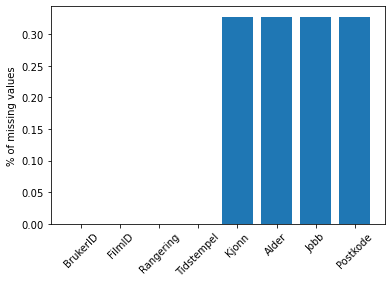

In [8]:
df_missing_vals = pd.DataFrame(missing_values).apply(lambda f: f/len(user_rankings))
plt.bar(df_missing_vals.index, df_missing_vals[0])
plt.xticks(rotation=45)
plt.ylabel('% of missing values')
plt.show()

In [9]:
user_rankings.dropna(inplace=True)
user_rankings.isnull().sum().sum()

0

In [10]:
films.head(2)

,FilmID,Tittel,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,Autumn in New York (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,"Vie est belle, La (Life is Rosey) (1987)",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## concatenate 

## Inspect date type

In [11]:
user_rankings.dtypes

BrukerID        int64
FilmID          int64
Rangering       int64
Tidstempel    float64
Kjonn          object
Alder         float64
Jobb          float64
Postkode       object
dtype: object

In [12]:
user_rankings.describe()

,BrukerID,FilmID,Rangering,Tidstempel,Alder,Jobb
count,604349.000000,604349.000000,604349.000000,6.043490e+05,604349.000000,604349.000000
mean,2973.336508,1990.252298,4.290987,9.722995e+08,29.680896,8.903317
std,1732.009217,1126.009162,1.976514,1.224330e+07,11.741975,11.522870
min,1.000000,0.000000,1.000000,9.567039e+08,1.000000,0.000000
25%,1457.000000,1039.000000,3.000000,9.652780e+08,25.000000,2.000000
50%,2954.000000,1959.000000,4.000000,9.730542e+08,25.000000,7.000000
75%,4469.000000,2963.000000,5.000000,9.752447e+08,35.000000,14.000000
max,6040.000000,3952.000000,10.000000,1.046438e+09,56.000000,99.000000


We have two types of categorical variables 'Kjonn' and 'Postkode'. The rest are numerical varibles                 

In [13]:
postcodes = list(user_rankings.Postkode)   

In [14]:
# let count the number of post code instances with -
dashed_postcode = [pcode for pcode in postcodes if len(pcode.split('-')) > 1]
print(f"Proportion of post code with dash {len(dashed_postcode)/len(postcodes)} %")

Proportion of post code with dash 0.013856232077822583 %


In [15]:
# Are there users leabving in the same postcode ?
unique_pcode = dict(sorted(Counter(postcodes).items(), key=lambda f: f[1], reverse=True))
unique_pcode

{'98103': 2630,
 '60640': 2440,
 '94110': 2284,
 '55112': 2177,
 '66048': 2170,
 '92120': 1911,
 '55408': 1768,
 '95380': 1766,
 '95616': 1742,
 '60201': 1740,
 '06460': 1721,
 '96707-1321': 1721,
 '77006': 1649,
 '92122': 1579,
 '10025': 1541,
 '90039': 1517,
 '27514': 1510,
 '60618': 1452,
 '22903': 1421,
 '60614': 1415,
 '02143': 1403,
 '02138': 1397,
 '79416': 1381,
 '20716': 1367,
 '95008': 1365,
 '80302': 1355,
 '11215': 1350,
 '10016': 1320,
 '92646': 1311,
 '08904': 1268,
 '55104': 1249,
 '94117': 1244,
 '55116': 1226,
 '02139': 1212,
 '22657': 1209,
 '80521': 1201,
 '60611': 1193,
 '43138': 1192,
 '55405': 1178,
 '98225': 1161,
 '12345': 1150,
 '68108': 1149,
 '94530': 1139,
 '55410': 1138,
 '06417': 1136,
 '48135': 1129,
 '92109': 1123,
 '53704': 1123,
 '92503': 1121,
 '17112': 1116,
 '43228': 1114,
 '15701': 1111,
 '11414-2520': 1099,
 '92026': 1094,
 '26101': 1088,
 '07040': 1066,
 '55406': 1060,
 '60657': 1054,
 '90210': 1053,
 '48073': 1039,
 '97214': 1034,
 '66044': 1032

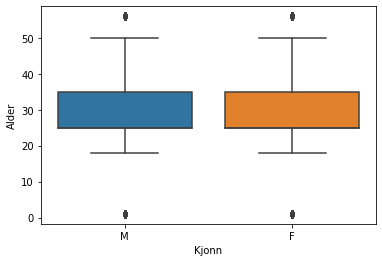

In [16]:
# proportion  of users per gender
sns.boxplot(
    x='Kjonn',
    y='Alder',
    data=user_rankings
)
plt.show()

Most users are ca between 25 and 35 for both gender. Few are above 50. But also as young as 1 ?

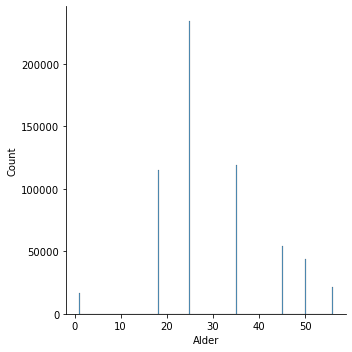

In [17]:
sns.displot(user_rankings.Alder, kind='hist')

One years old can not possibly rate a movie objectively. So let remove all data where the age is less then 2

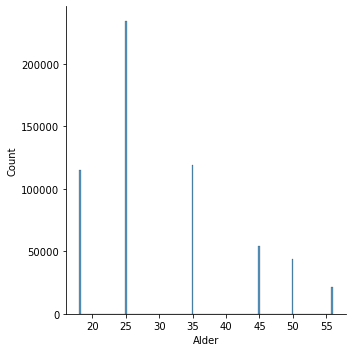

In [18]:
user_ranking_filtered = user_rankings[user_rankings['Alder'] >= 2]
sns.displot(user_ranking_filtered.Alder, kind='hist')

In [19]:
user_ranking_filtered.describe()

,BrukerID,FilmID,Rangering,Tidstempel,Alder,Jobb
count,587779.000000,587779.000000,587779.000000,5.877790e+05,587779.000000,587779.000000
mean,2964.923049,1989.783032,4.291101,9.721732e+08,30.489436,8.900158
std,1729.452261,1125.817093,1.974109,1.202573e+07,10.858976,11.626190
min,1.000000,0.000000,1.000000,9.567039e+08,18.000000,0.000000
25%,1452.000000,1039.000000,3.000000,9.652781e+08,25.000000,2.000000
50%,2948.000000,1959.000000,4.000000,9.728459e+08,25.000000,7.000000
75%,4456.000000,2962.000000,5.000000,9.752255e+08,35.000000,14.000000
max,6040.000000,3952.000000,10.000000,1.046438e+09,56.000000,99.000000


the Minimum age is 18. This makes more sens.

<AxesSubplot:>

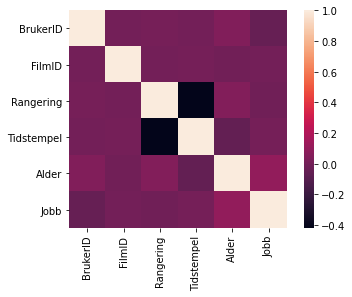

In [20]:
method='spearman'
corr = user_ranking_filtered.corr(method=method)
sns.heatmap(corr,square=True)

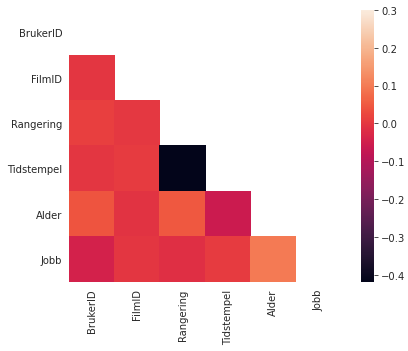

In [21]:
method='spearman'
corr = user_ranking_filtered.corr(method=method)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

<AxesSubplot:xlabel='Alder', ylabel='Rangering'>

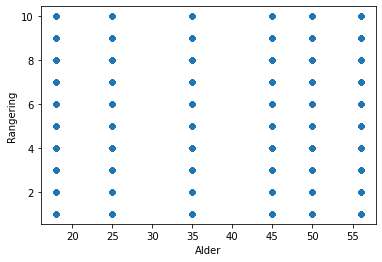

In [22]:
user_ranking_filtered.plot(x='Alder', y='Rangering', kind='scatter')

In [23]:
# group ranking per age
age_ranking = user_ranking_filtered[['Alder','Rangering']]
age_ranking.head(2)

,Alder,Rangering
237,50.0,5
238,50.0,3


In [24]:
groups = age_ranking.groupby(['Alder']).sum()
groups.head(4)

,Rangering
Alder,
18.0,472662
25.0,1006161
35.0,515398
45.0,241612


In [25]:
# join all data
data = user_ranking_filtered.join(films.set_index('FilmID'), on='FilmID', sort=True)
data.head()

,BrukerID,FilmID,Rangering,Tidstempel,Kjonn,Alder,Jobb,Postkode,Tittel,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
18624,122,0,4,983387246.0,M,25.0,4.0,43138,Autumn in New York (2000),0,...,0,0,0,0,0,1,0,0,0,0
23082,149,0,3,973828494.0,M,50.0,7.0,80004-4448,Autumn in New York (2000),0,...,0,0,0,0,0,1,0,0,0,0
40529,276,0,3,974947232.0,M,25.0,7.0,91344,Autumn in New York (2000),0,...,0,0,0,0,0,1,0,0,0,0
55880,398,0,1,979537270.0,M,25.0,4.0,90210,Autumn in New York (2000),0,...,0,0,0,0,0,1,0,0,0,0
66060,454,0,2,966903589.0,M,35.0,2.0,62263-3004,Autumn in New York (2000),0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
data.isnull().sum()

BrukerID       0
FilmID         0
Rangering      0
Tidstempel     0
Kjonn          0
Alder          0
Jobb           0
Postkode       0
Tittel         0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [27]:
#data.to_csv('joined_data.csv', index=None)

In [28]:
data.dtypes

BrukerID         int64
FilmID           int64
Rangering        int64
Tidstempel     float64
Kjonn           object
Alder          float64
Jobb           float64
Postkode        object
Tittel          object
Action           int64
Adventure        int64
Animation        int64
Children         int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

In [29]:
# set numerical and categorical feature
categorical_cols = ['Kjonn', 'Postkode', 'Tittel']
columns = list(data.columns)
difference = set(columns).symmetric_difference(set(categorical_cols))
numerical_cols = list(difference)
numerical_cols

['Romance',
 'Rangering',
 'Musical',
 'Horror',
 'Western',
 'Thriller',
 'FilmID',
 'BrukerID',
 'Mystery',
 'Documentary',
 'Alder',
 'Film-Noir',
 'Jobb',
 'Action',
 'War',
 'Animation',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Tidstempel']

In [30]:
pd.to_datetime('966903589', format='%Y%m%d', errors='ignore')

'966903589'

In [31]:
pd.to_datetime(966903589, unit='s')

Timestamp('2000-08-22 00:19:49')

In [32]:
# add human readable time
data = data.assign(
    date = data.Tidstempel.apply(lambda x: pd.to_datetime(x, unit='s'))
)

In [33]:
data

,BrukerID,FilmID,Rangering,Tidstempel,Kjonn,Alder,Jobb,Postkode,Tittel,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,date
18624,122,0,4,983387246.0,M,25.0,4.0,43138,Autumn in New York (2000),0,...,0,0,0,0,1,0,0,0,0,2001-02-28 19:07:26
23082,149,0,3,973828494.0,M,50.0,7.0,80004-4448,Autumn in New York (2000),0,...,0,0,0,0,1,0,0,0,0,2000-11-10 03:54:54
40529,276,0,3,974947232.0,M,25.0,7.0,91344,Autumn in New York (2000),0,...,0,0,0,0,1,0,0,0,0,2000-11-23 02:40:32
55880,398,0,1,979537270.0,M,25.0,4.0,90210,Autumn in New York (2000),0,...,0,0,0,0,1,0,0,0,0,2001-01-15 05:41:10
66060,454,0,2,966903589.0,M,35.0,2.0,62263-3004,Autumn in New York (2000),0,...,0,0,0,0,1,0,0,0,0,2000-08-22 00:19:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848799,5696,3952,3,975653339.0,F,25.0,7.0,12345,Prom Night (1980),0,...,0,1,0,0,0,0,0,0,0,2000-12-01 06:48:59
865275,5819,3952,6,957249196.0,F,35.0,0.0,33607,Prom Night (1980),0,...,0,1,0,0,0,0,0,0,0,2000-05-02 06:33:16
869037,5845,3952,1,965256844.0,M,45.0,5.0,32953,Prom Night (1980),0,...,0,1,0,0,0,0,0,0,0,2000-08-02 22:54:04
878561,5905,3952,3,957908567.0,M,25.0,1.0,92120,Prom Night (1980),0,...,0,1,0,0,0,0,0,0,0,2000-05-09 21:42:47


In [45]:
def get_movie_date(s):
    return int(s.split()[-1].strip('()'))


data = data.assign(
    movie_released_date = data.Tittel.apply( lambda s: get_movie_date(s) ),
    year=data.date.dt.year,
    month=data.date.dt.month,
    day=data.date.dt.day,
    hour=data.date.dt.hour
)
data

,BrukerID,FilmID,Rangering,Tidstempel,Kjonn,Alder,Jobb,Postkode,Tittel,Action,...,Sci-Fi,Thriller,War,Western,date,month,day,hour,year,movie_released_date
18624,122,0,4,983387246.0,M,25.0,4.0,43138,Autumn in New York (2000),0,...,0,0,0,0,2001-02-28 19:07:26,2,28,19,2001,2000
23082,149,0,3,973828494.0,M,50.0,7.0,80004-4448,Autumn in New York (2000),0,...,0,0,0,0,2000-11-10 03:54:54,11,10,3,2000,2000
40529,276,0,3,974947232.0,M,25.0,7.0,91344,Autumn in New York (2000),0,...,0,0,0,0,2000-11-23 02:40:32,11,23,2,2000,2000
55880,398,0,1,979537270.0,M,25.0,4.0,90210,Autumn in New York (2000),0,...,0,0,0,0,2001-01-15 05:41:10,1,15,5,2001,2000
66060,454,0,2,966903589.0,M,35.0,2.0,62263-3004,Autumn in New York (2000),0,...,0,0,0,0,2000-08-22 00:19:49,8,22,0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848799,5696,3952,3,975653339.0,F,25.0,7.0,12345,Prom Night (1980),0,...,0,0,0,0,2000-12-01 06:48:59,12,1,6,2000,1980
865275,5819,3952,6,957249196.0,F,35.0,0.0,33607,Prom Night (1980),0,...,0,0,0,0,2000-05-02 06:33:16,5,2,6,2000,1980
869037,5845,3952,1,965256844.0,M,45.0,5.0,32953,Prom Night (1980),0,...,0,0,0,0,2000-08-02 22:54:04,8,2,22,2000,1980
878561,5905,3952,3,957908567.0,M,25.0,1.0,92120,Prom Night (1980),0,...,0,0,0,0,2000-05-09 21:42:47,5,9,21,2000,1980


In [41]:
s = list(data['Tittel'])[0]
s.split()[-1].strip('()')

'2000'

BrukerID                int64
FilmID                  int64
Rangering               int64
Tidstempel            float64
Kjonn                  object
Alder                 float64
Jobb                  float64
Postkode               object
Tittel                 object
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
date           datetime64[ns]
month                   int64
day                     int64
hour                    int64
year                    int64
dtype: object